# " Health Hackathon "

### Le but de ce hackathon est de tenter de vérifier s'il y'a un lien entre la densité de médecins par spécialité et territoire et la pratique du dépassement d'honoraires, une corrélation entre certaines classes d'âges et la densité de médecins, etc

##### Pour vérifier ces hypothèses, nous allons chercher des données, tester des hypothèses et valider ou rejeter certaines.

In [1]:
#Import des packages 

In [53]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
import bokeh
from bokeh import mpl 
from bokeh.plotting import *

In [3]:
#Import du fichier 
data = pd.read_excel("dataHackathon.xls", sheetname = [1, 2, 3, 4, 5, 6], encode = 'utf-8')

In [4]:
print data[2].head()

                              SPECIALISTES             DEPARTEMENT  EFFECTIFS  \
0  02- Anesthesie-reanimation chirurgicale                 01- Ain       17.0   
1  02- Anesthesie-reanimation chirurgicale               02- Aisne       22.0   
2  02- Anesthesie-reanimation chirurgicale              03- Allier       19.0   
3  02- Anesthesie-reanimation chirurgicale  04- Alpes-Hte-Provence        4.0   
4  02- Anesthesie-reanimation chirurgicale        05- Hautes-Alpes        7.0   

  HONORAIRES SANS DEPASSEMENT (euros) DEPASSEMENTS (euros)  \
0                             4329488              1879396   
1                             4615160               191421   
2                             4872085               416466   
3                                  nc                   nc   
4                                  nc                   nc   

  FRAIS DE DEPLACEMENTS (euros) HONORAIRES TOTAUX (euros)  \
0                             0                   6208884   
1                 

In [5]:
#Quick Stats
for i in data[2][2:]:
    print "Stats de la colonne", i
    print data[2][i].describe(), "\n"

Stats de la colonne SPECIALISTES
count                            8240
unique                             55
top       37- Anatomo-cyto-pathologie
freq                              206
Name: SPECIALISTES, dtype: object 

Stats de la colonne DEPARTEMENT
count                   8240
unique                   103
top       49- Maine-et-Loire
freq                      80
Name: DEPARTEMENT, dtype: object 

Stats de la colonne EFFECTIFS
count      5562.000000
mean        105.779935
std        1788.046856
min           0.000000
25%                NaN
50%                NaN
75%                NaN
max      114020.000000
Name: EFFECTIFS, dtype: float64 

Stats de la colonne HONORAIRES SANS DEPASSEMENT (euros)
count     5562
unique    1927
top         nc
freq      2265
Name: HONORAIRES SANS DEPASSEMENT (euros), dtype: object 

Stats de la colonne DEPASSEMENTS (euros)
count     5562
unique    1910
top         nc
freq      2265
Name: DEPASSEMENTS (euros), dtype: object 

Stats de la colonne FRAIS DE

C:\Users\Rim\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [6]:
#Eliminer les nc et na
df = data[2]
df = df.replace('nc', np.nan).dropna()

#df["DEPARTEMENT"]re.sub('^\w+\w+\-+\s+\s', '', x)
#df["DEPARTEMENT"] = df["DEPARTEMENT"].applymap(lambda x: re.sub('^\w+\w+\-+\s', x))

#Rajouter les colonnes numero de départements et numéro de la spécialité
#Ne garder que les effectifs non nuls
#Transformer les dépassements au format souhaité
df = df[df['DEPARTEMENT'].str.contains('- ')]
df = df[df['SPECIALISTES'].str.contains('- ')]
dep = pd.DataFrame([[x] + x.split('- ') for x in df['DEPARTEMENT']], columns=['DEPARTEMENT', 'num_dep', 'name_dep'])
spec = pd.DataFrame([[x] + x.split('- ') for x in df['SPECIALISTES']],columns=['SPECIALISTES', 'num_spec', 'name_spec'])
df = pd.concat([df, dep, spec], axis=1, join='inner')
df['num_dep'] = df['num_dep'].str.replace('^0', '').str.replace( 'B', '.5').str.replace('A', '.25').astype('float')
df['num_spec'] = df['num_spec'].replace('^0', '').astype('float')
df['DEPASSEMENTS (euros)'] = df['DEPASSEMENTS (euros)'].astype('float')
df = df[df['EFFECTIFS'] > 0]
print(df.head())


                              SPECIALISTES          DEPARTEMENT  EFFECTIFS  \
0  02- Anesthesie-reanimation chirurgicale              01- Ain       17.0   
1  02- Anesthesie-reanimation chirurgicale            02- Aisne       22.0   
2  02- Anesthesie-reanimation chirurgicale           03- Allier       19.0   
5  02- Anesthesie-reanimation chirurgicale  06- Alpes-Maritimes      105.0   
6  02- Anesthesie-reanimation chirurgicale          07- Ardèche       21.0   

   HONORAIRES SANS DEPASSEMENT (euros)  DEPASSEMENTS (euros)  \
0                            4329488.0             1879396.0   
1                            4615160.0              191421.0   
2                            4872085.0              416466.0   
5                           21618434.0             9266410.0   
6                            5212563.0              682624.0   

   FRAIS DE DEPLACEMENTS (euros)  HONORAIRES TOTAUX (euros)  \
0                            0.0                  6208884.0   
1                   

C:\Users\Rim\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


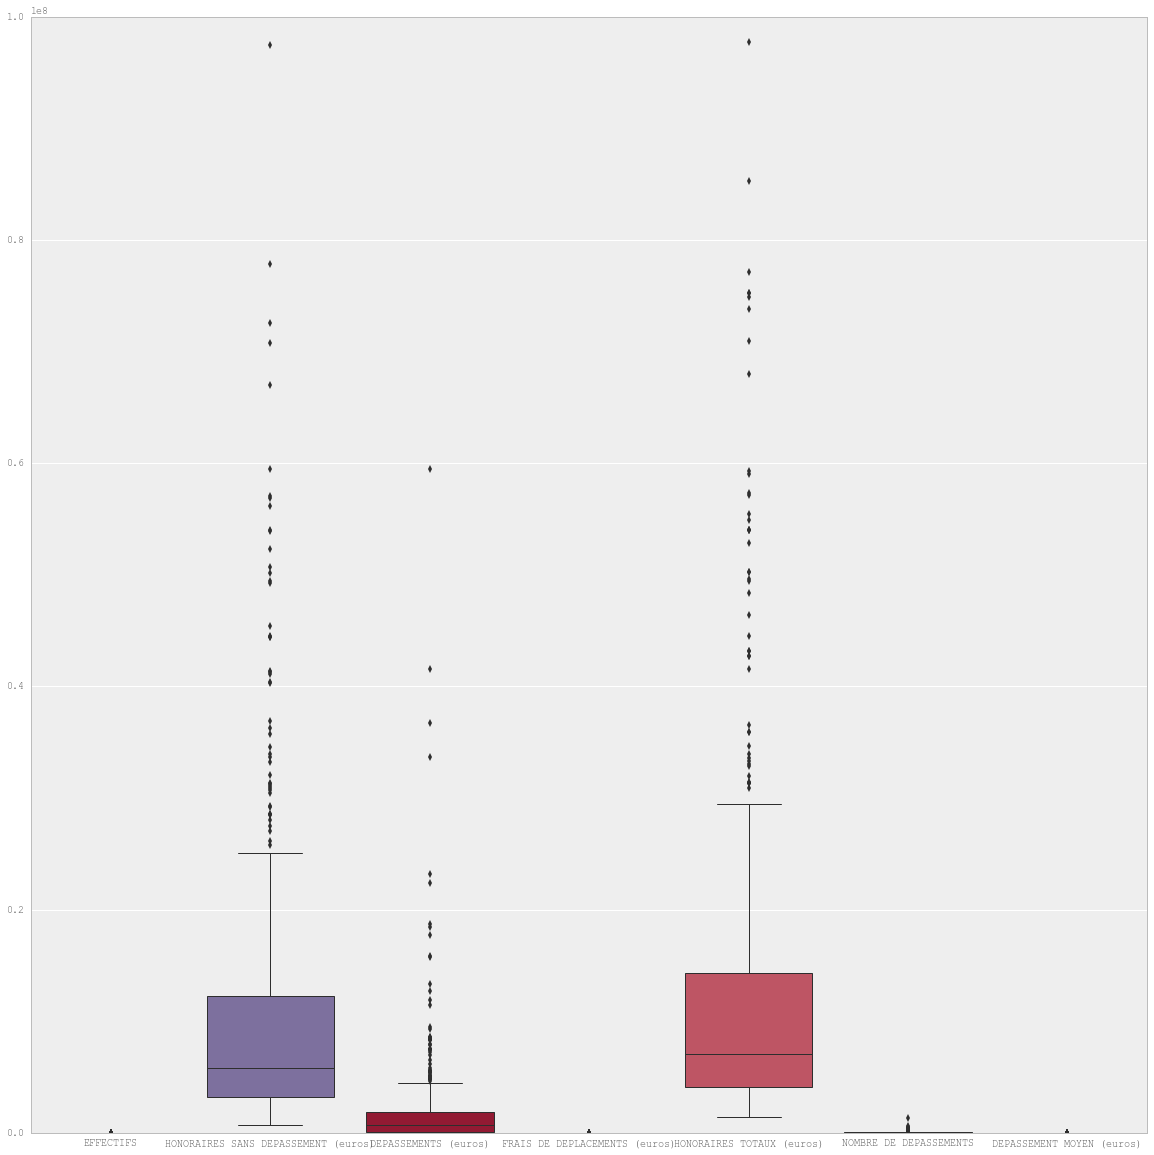

In [7]:
#Quick and dirty plots
import matplotlib.pyplot as plt
pd.options.display.mpl_style = 'default'
plt.figure(figsize=(20,20))
#plt.axis([0,10000,0,100000])

liste = df.columns.values
liste = [u'EFFECTIFS', u'HONORAIRES SANS DEPASSEMENT (euros)', u'DEPASSEMENTS (euros)',
 u'FRAIS DE DEPLACEMENTS (euros)', u'HONORAIRES TOTAUX (euros)',
 u'NOMBRE DE DEPASSEMENTS', u'DEPASSEMENT MOYEN (euros)']

sns.boxplot(data=df[liste])
plt.ylim(0,100000000)
plt.show()

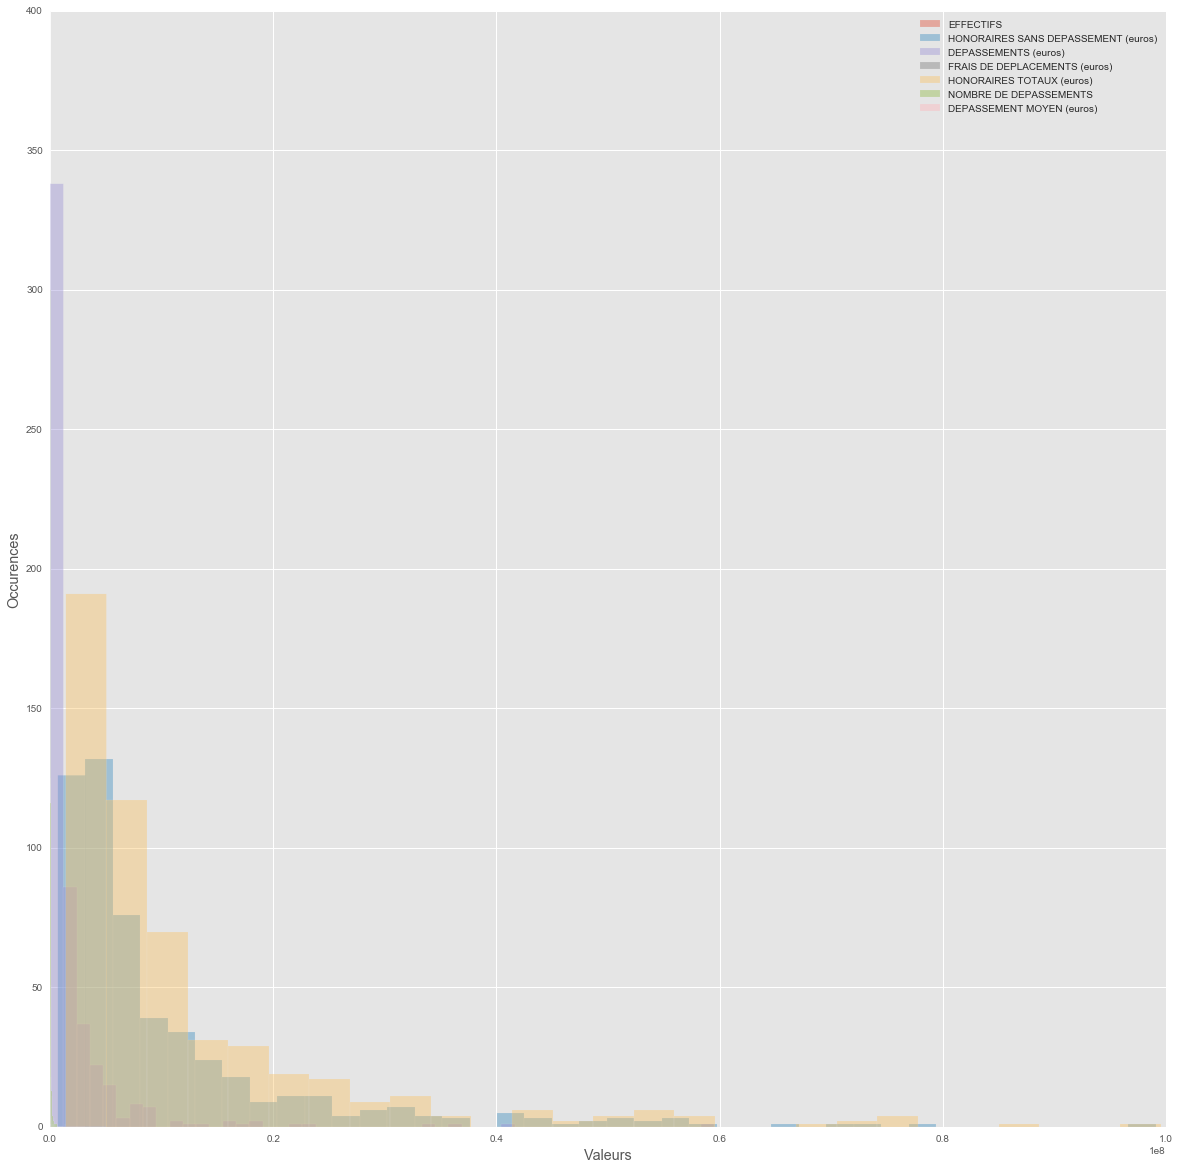

In [20]:
#Dirty analysis
#Plot d'un histrogramme

fig, ax = plt.subplots(figsize=(20,20),sharey=True)
sns.despine(left=True)
sns.color_palette("Set2", 10)
sns.set(color_codes=True)
plt.xlim(0,100000000)
plt.ylim(0,400)
sns.set(style="white", palette="muted")
for i in liste :
    f = sns.distplot(df[str(i)], kde=False, label = i)
ax.set(xlabel='Valeurs', ylabel='Occurences')
f.legend()


In [9]:
#df.groupby("num_spec")

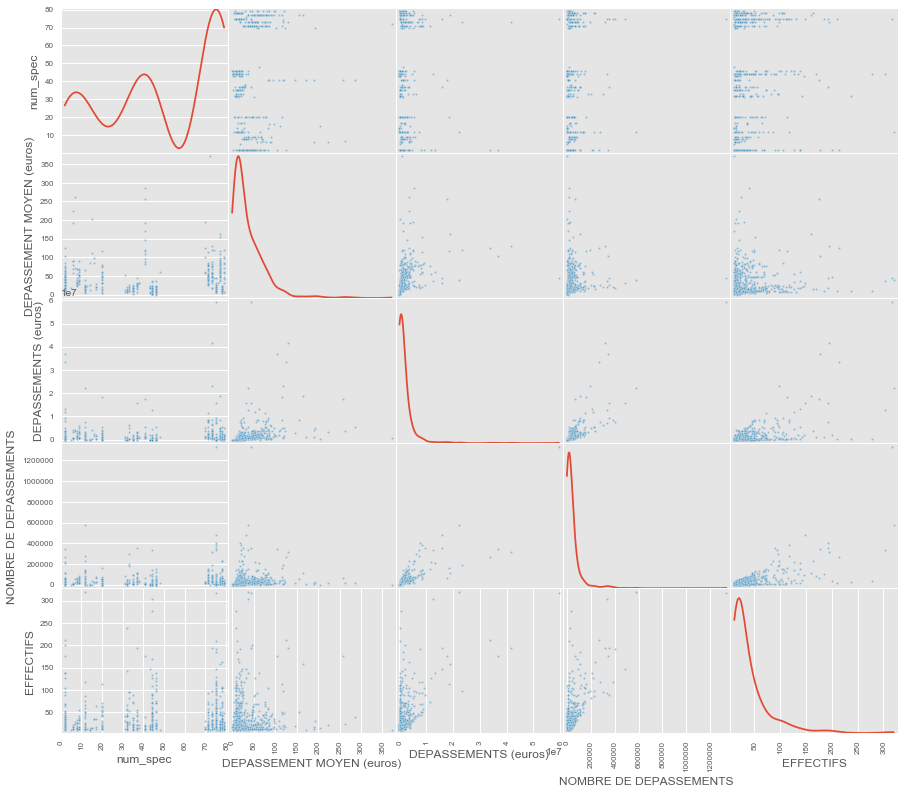

In [51]:
dat = df[['num_spec', 'DEPASSEMENT MOYEN (euros)', 'DEPASSEMENTS (euros)', 'NOMBRE DE DEPASSEMENTS','EFFECTIFS']]
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
scatter_matrix(dat, diagonal='kde',figsize=(15,13))
plt.show()

### Vérifions les corrélations entre les variables 

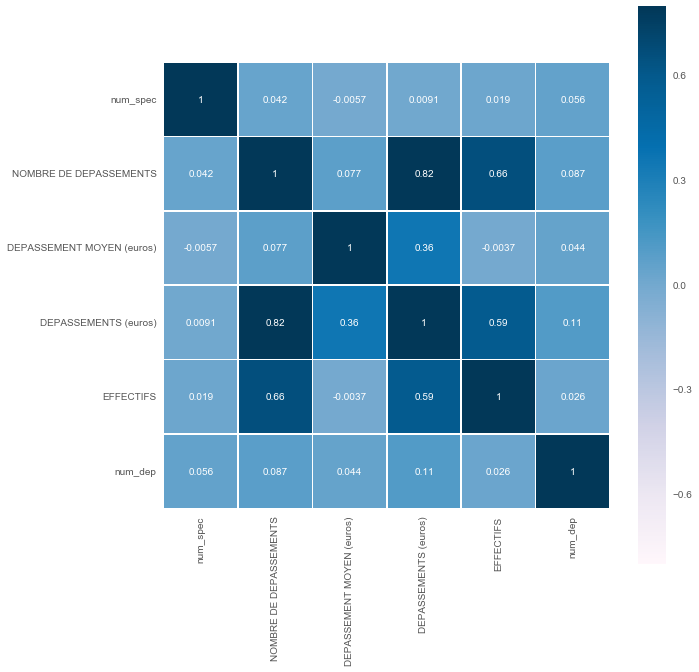

In [18]:
data_correlation = df[['num_spec', 'NOMBRE DE DEPASSEMENTS', 'DEPASSEMENT MOYEN (euros)', 'DEPASSEMENTS (euros)', 'EFFECTIFS', 'num_dep']]
corr_mat = data_correlation.corr()
cmap = sns.dark_palette("#2ecc71", as_cmap=True)
plt.figure(figsize=(10,10))
sns.color_palette("YlOrRd", 10)
sns.heatmap(corr_mat, square = True, vmax = 0.8, annot = True, linewidths = .5, cmap ='PuBu')
plt.show()

### On remarque des corrélations entre certaines variables :
#### Le nombre de dépassements et le montant des dépassements, le montant des dépassements et les effectifs et la corrélation entre les effectifs et le nombre de dépassements.

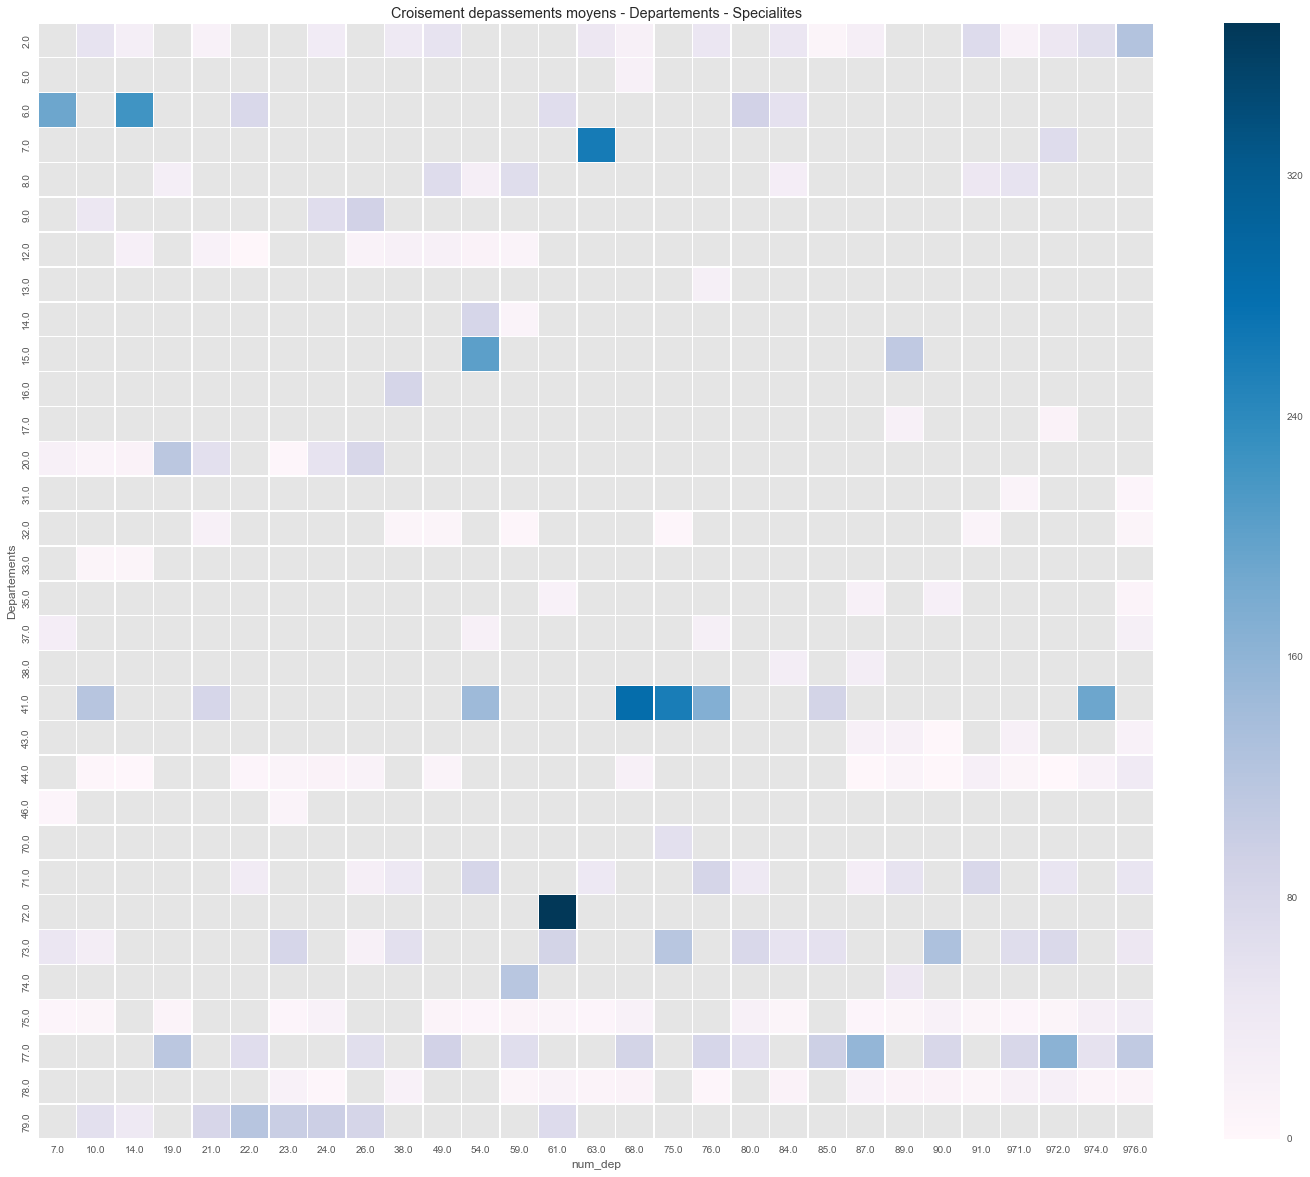

In [19]:

df_copy = df.groupby(df["num_dep"])['DEPASSEMENT MOYEN (euros)'].sum()
df_copy2 = df.groupby(df["num_spec"])['DEPASSEMENT MOYEN (euros)'].sum()
dir = df_copy.sort_values(ascending=False)[:23].index
piv = pd.pivot_table(data = df[df["num_dep"].isin(dir)],
                                        index=["num_spec"],
                                        columns=["num_dep"],
                                        values=["DEPASSEMENT MOYEN (euros)"],
                                        aggfunc= np.sum)
fig,ax = plt.subplots(figsize=(25,20))
sns.heatmap(piv['DEPASSEMENT MOYEN (euros)'],vmin=0,annot=False,linewidth=.5,ax=ax,cmap='PuBu')
plt.title('Croisement depassements moyens - Departements - Specialites')
plt.ylabel('Departements')

#### On remarque pour certaines spécialités sur certains départements, des dépassements moyens sont plus importants. En effet, quand on vérifie les effectifs pour le département, on s'apreçoit que les départements avec le moins d'effectifs et le moins de médecins de spécialité sont les départements qui observent une plus grosse moyenne de dépassements.

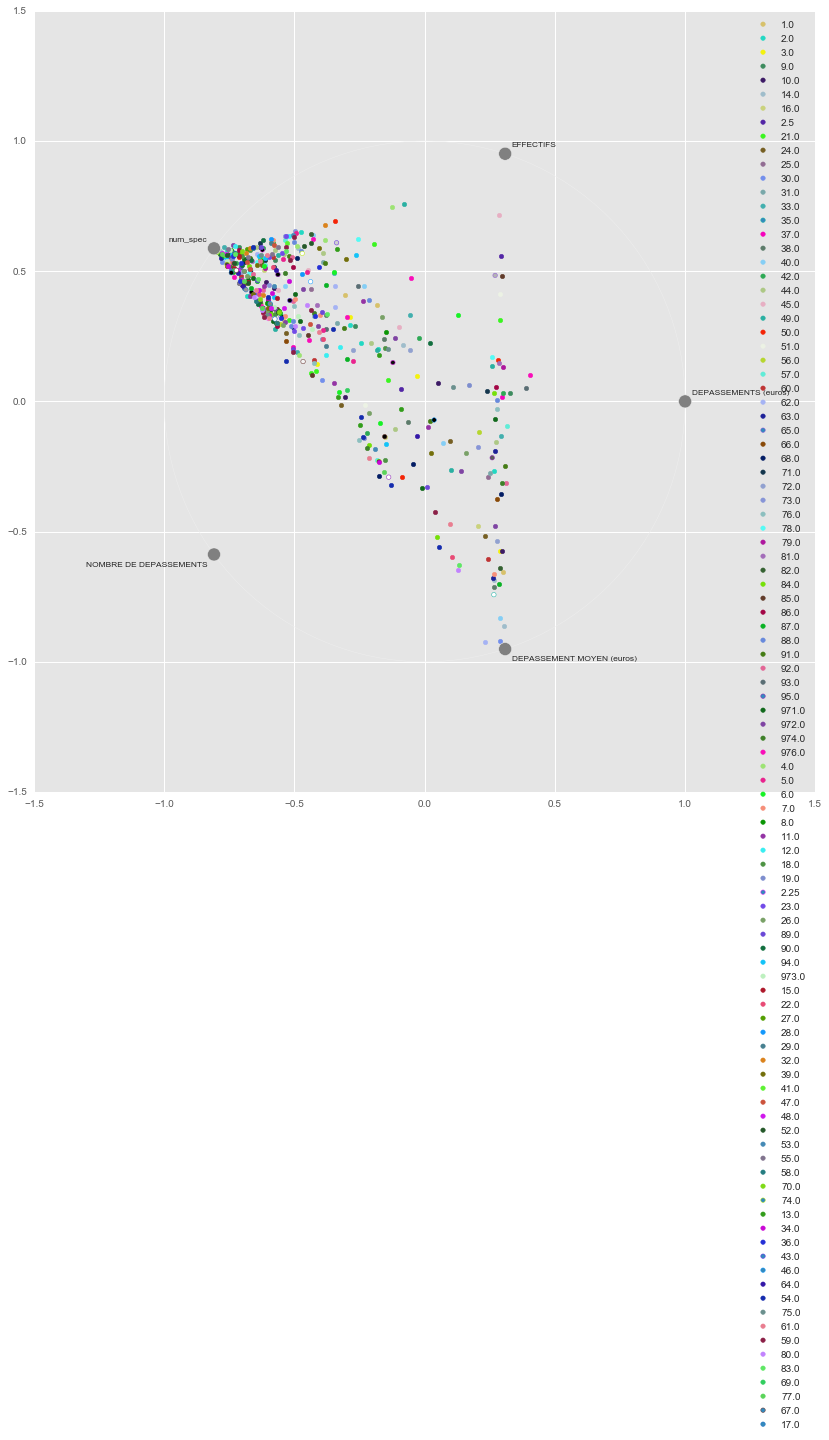

In [47]:
#Plot multivariables
dat_rad = df[['DEPASSEMENTS (euros)', 'EFFECTIFS', 'num_spec','NOMBRE DE DEPASSEMENTS', 'DEPASSEMENT MOYEN (euros)', 'num_dep'][:10]]
plt.figure(figsize=(14,14))
pd.tools.plotting.radviz(dat_rad, 'num_dep')
plt.legend(frameon=False)
plt.show()

#### On remarque que pour certaines spécialités, les effectifs sont grands, et que pour d'autres, les dépassements moyens sont plus importants. Le montant et le nombre de dépassement ne sont pas influents par rapport à la spécialité.

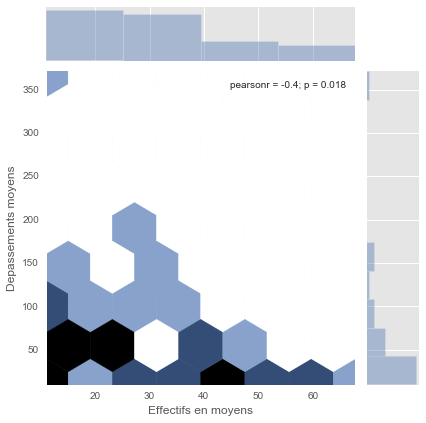

In [52]:
groups = df.groupby(['name_spec'])
plt.figure()
x = []
y = []
for name, group in groups:
    avg_eff = group['EFFECTIFS'].mean()
    avg_depassementmoyen = group['DEPASSEMENT MOYEN (euros)'].mean()
    x.append(avg_eff)
    y.append(avg_depassementmoyen)
c = np.column_stack((np.asarray(x),np.asarray(y)))
data = pd.DataFrame(c, columns=['Effectifs en moyens','Depassements moyens'])
sns.jointplot('Effectifs en moyens','Depassements moyens', data=data, kind="hex", color="b")
plt.show()

#### Plus une spécialité est rare pour les effectifs, plus les dépassements sont fréquents.